In [34]:
import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import csv
import os
from scipy.optimize import curve_fit
import scipy
from scipy.fft import fft, rfft, irfft,ifft,fftfreq

#Read in the runlist
Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

#varible for location of data, relative to this directory.
#env_var_wavefromloc ="data/waveforms/"
#pc 2
env_var_wavefromloc ="A:/DATA/waveforms/"



Defining a class for runs.  RUN(runnumber, confignumber)

In [9]:
class RUN:
    def __init__(self, runnumber, confignumber):
        self.runnumber="%05d"%(int(runnumber))
        self.config = "%03d"%(int(confignumber))

    #def _init(R 
        

In [10]:
R1=RUN(1,131)
R1.config

'131'

In [11]:
def findRun(runnumber,confignumber):
    DBinfo=Runlist.query("RN == %d"%(runnumber)    



SyntaxError: incomplete input (1208073851.py, line 3)

In [12]:
findRun(50,"131")

NameError: name 'findRun' is not defined

Fitting function for guass error

In [13]:
def errfunc(x, a, b, z, f):
    return a * scipy.special.erf((x - z)*f) + b

def gaussian(x, amplitude, mean, stddev):
    return amplitude * np.exp(-((x - mean) / 4 / stddev)**2)

Small Function to get Wavefrom data from an entry in a runlist 

In [33]:
def GetWaveform(RL_entry,wavenumber=11):
    DF=pd.DataFrame()
    Lineone=""

    waveform_loc=env_var_wavefromloc
    wavefrom_subloc=""#"%s/"%(int(RL_entry["Date"]))
   
    dirpath = waveform_loc+wavefrom_subloc+"%s-%s%05d"%(int(RL_entry["Date"]),int(RL_entry["Config Number"]),int(RL_entry["Run Number"]))
    #print(dirpath)
    if os.path.exists(dirpath):
        file="%s-%s%05d*%d.csv"%(int(RL_entry["Date"]),int(RL_entry["Config Number"]),int(RL_entry["Run Number"]),wavenumber)    
        flist=glob.glob(dirpath+"/"+file)        
        filename = flist[-1]#dirpath + "/" + file 
        #print(filename)
        if os.path.exists(filename):
            DF=pd.read_csv(filename,skiprows=[1])
            ofile=open(filename)
            Lineone = ofile.readlines()[1]
        else:
            print("Try new waveform")
            print(glob.glob(dirpath + "/*"))
        
        for name in DF.keys():
            
            if "(2)" in name:    
                DF=DF.rename(columns={name:name.replace(" (2)","")},errors="raise")
            elif "(B)" in name:
                
                DF=DF.rename(columns={name:"Average Cathode"},errors="raise")
            elif "(C)" in name:
                DF=DF.rename(columns={name:name.replace("average(C)","Average Anode")},errors="raise")


        #print(DF.keys())
        units = Lineone.split(",")
        for i,unit in enumerate(units):
            if "(V)" in unit:               
                DF[DF.keys()[i]]=DF[DF.keys()[i]]*1000



    else:
        print("Try New Run")
        print(dirpath)


    #if != pd.api.types.is_any_real_numeric_dtype(WF["Average Anode"]):
        


    return DF


In [32]:
GetWaveform(Runlist_q.iloc[0])

IndexError: single positional indexer is out-of-bounds

In [22]:
run1.config

NameError: name 'run1' is not defined

Read in the runlist store as a Dataframe named Runlist

In [23]:
Runlist_q

,RN,Date,Config Number,Run Number,Configuration,type,Anode Voltage,Cathode Voltage,Laser Current,Laser Frequency,...,Target Pressure,TC1(K),TC2(K),TC3(K),Drift Length,Filepath (GDrive),Filepath (ODrive),Filepath (server),window(us),Notes
45,46.0,20240522.0,131.0,46.0,SingleGrid_20mm,Production,200.0,74.6,27.0,789.0,...,16.03,294.3,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
46,47.0,20240522.0,131.0,47.0,SingleGrid_20mm,Production,190.6,74.6,27.0,789.0,...,16.03,294.3,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
47,48.0,20240522.0,131.0,48.0,SingleGrid_20mm,Production,180.6,74.6,27.0,789.0,...,16.03,294.3,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
48,49.0,20240522.0,131.0,49.0,SingleGrid_20mm,Production,170.6,74.6,27.0,789.0,...,16.01,294.3,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
49,50.0,20240522.0,131.0,50.0,SingleGrid_20mm,Production,160.4,74.6,27.0,789.0,...,16.01,294.4,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
50,51.0,20240522.0,131.0,51.0,SingleGrid_20mm,Production,150.4,74.6,27.0,789.0,...,16.02,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN
51,52.0,20240522.0,131.0,52.0,SingleGrid_20mm,Production,140.4,74.6,27.0,789.0,...,16.01,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN
52,53.0,20240522.0,131.0,53.0,SingleGrid_20mm,Production,130.2,74.6,27.0,789.0,...,16.03,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN
53,54.0,20240522.0,131.0,54.0,SingleGrid_20mm,Production,120.4,74.6,27.0,789.0,...,16.02,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN
54,55.0,20240522.0,131.0,55.0,SingleGrid_20mm,Production,110.4,74.6,27.0,789.0,...,16.01,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN


Build a shorter runlist with a query: Take that short run list and plot a few average waveforms

In [24]:
Runlist_q = Runlist.query("RN >= 46 & RN <= 56")
Runlist_q

,RN,Date,Config Number,Run Number,Configuration,type,Anode Voltage,Cathode Voltage,Laser Current,Laser Frequency,...,Target Pressure,TC1(K),TC2(K),TC3(K),Drift Length,Filepath (GDrive),Filepath (ODrive),Filepath (server),window(us),Notes
45,46.0,20240522.0,131.0,46.0,SingleGrid_20mm,Production,200.0,74.6,27.0,789.0,...,16.03,294.3,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
46,47.0,20240522.0,131.0,47.0,SingleGrid_20mm,Production,190.6,74.6,27.0,789.0,...,16.03,294.3,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
47,48.0,20240522.0,131.0,48.0,SingleGrid_20mm,Production,180.6,74.6,27.0,789.0,...,16.03,294.3,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
48,49.0,20240522.0,131.0,49.0,SingleGrid_20mm,Production,170.6,74.6,27.0,789.0,...,16.01,294.3,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
49,50.0,20240522.0,131.0,50.0,SingleGrid_20mm,Production,160.4,74.6,27.0,789.0,...,16.01,294.4,294.1,294.6,30.0,NaN,NaN,NaN,50.0,NaN
50,51.0,20240522.0,131.0,51.0,SingleGrid_20mm,Production,150.4,74.6,27.0,789.0,...,16.02,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN
51,52.0,20240522.0,131.0,52.0,SingleGrid_20mm,Production,140.4,74.6,27.0,789.0,...,16.01,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN
52,53.0,20240522.0,131.0,53.0,SingleGrid_20mm,Production,130.2,74.6,27.0,789.0,...,16.03,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN
53,54.0,20240522.0,131.0,54.0,SingleGrid_20mm,Production,120.4,74.6,27.0,789.0,...,16.02,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN
54,55.0,20240522.0,131.0,55.0,SingleGrid_20mm,Production,110.4,74.6,27.0,789.0,...,16.01,294.4,294.2,294.6,30.0,NaN,NaN,NaN,50.0,NaN


56.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.002              0.0         42.81496       42.63041       31.75249   

   Average Cathode  
1         37.56602  
55.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.002              0.0         33.29847       36.31274       31.76777   

   Average Cathode  
1         38.40388  
54.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.004              0.0         47.57013       53.67864       30.85797   

   Average Cathode  
1          37.9588  
53.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.004              0.0          26.9562       20.52165       30.20108   

   Average Cathode  
1         38.12648  
52.0
     Time  Channel Trigger  Channel Cathode  Channel Anode  Average Anode  \
1 -10.004              0.0         39.64074       33.15699       29.12043   

   Average Cathode  
1         3

Text(92.09722222222221, 0.5, 'Preamp Signal [mV]')

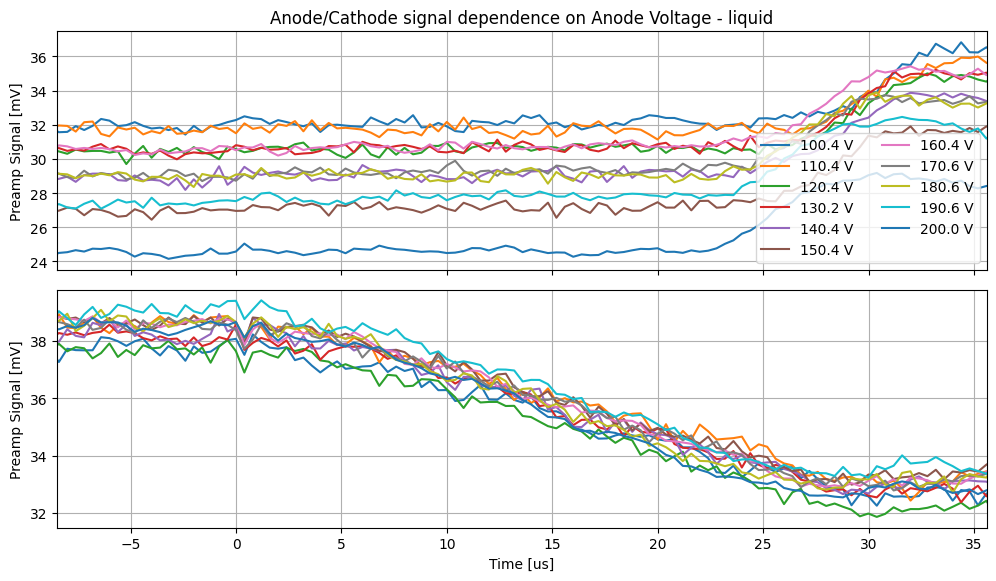

In [25]:

fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Anode Voltage"
unit ="V"

for i, entry in enumerate(Runlist_q[::-1].iloc()):
    print(entry["RN"])
    WF=GetWaveform(entry)

    print(WF[1:2])
    
    steps=100

    Run={}
    Run["info"]=entry
    Run["wavefrom"]=WF
    Runs.append(Run)
    try:
        plots[0].errorbar(x=WF[::steps]["Time"], y= WF[::steps]["Average Anode"], fmt ="", label="%s %s"%(entry[Label], unit) )
        plots[1].errorbar(x=WF[::steps]["Time"], y= WF[::steps]["Average Cathode"], fmt ="", label="%s %s"%(entry[Label], unit) )
    except:
        print("Iissue with run ", i)
        break
    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal dependence on %s - liquid"%(Label))
plots[0].legend(ncol=2)

plots[1].set_xlim(-8.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()

Runs 38-42 Cathode dependence for cold gas

113.0
            Time  Channel Trigger  Channel Cathode  Channel Anode  Channel UV  \
0     -10.005000              0.0         17.43971       20.52165         0.0   
1     -10.001000              0.0         15.85261       20.52165         0.0   
2      -9.997000              0.0         15.85261       20.52165         0.0   
3      -9.993000              0.0         14.27165       20.52165         0.0   
4      -9.989000              0.0         14.27165       20.52165         0.0   
...          ...              ...              ...            ...         ...   
12498  39.986999              0.0         11.09744       31.57603         0.0   
12499  39.990999              0.0         12.68455       31.57603         0.0   
12500  39.994999              0.0         12.68455       31.57603         0.0   
12501  39.998999              0.0         14.27165       31.57603         0.0   
12502  40.002999              0.0         14.27165       31.57603         0.0   

       Average Anode 

Text(89.34722222222221, 0.5, 'Preamp Signal [mV]')

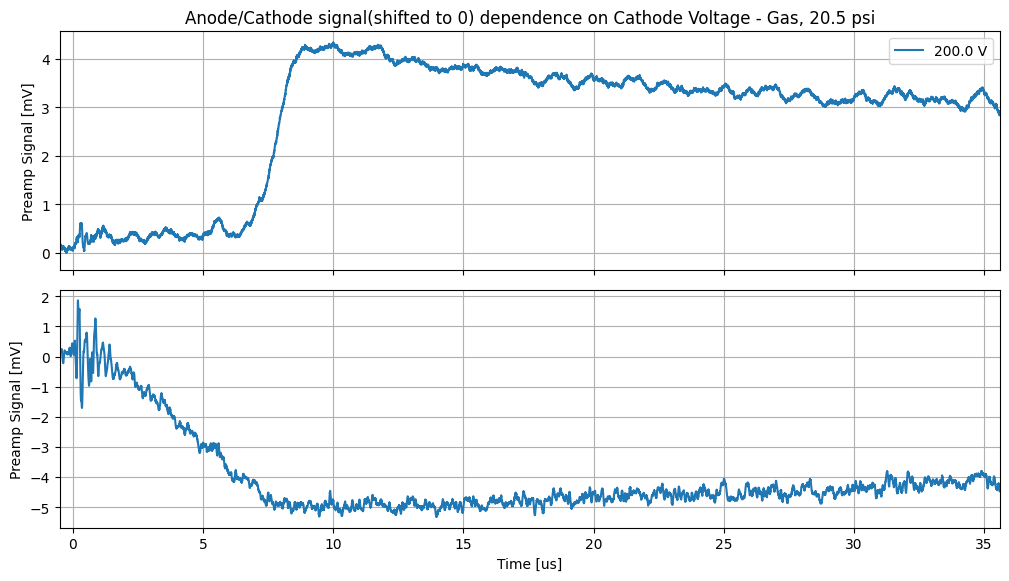

In [43]:
Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

Runlist_q = Runlist.query("RN in [113,114]")

#35,36,37,,100,102,103
Runlist_q
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::].iloc()):
    print(entry["RN"])
    WF=GetWaveform(entry)

    print(WF)
    
    Run={}
    Run["info"]=entry
    Run["waveform"]=WF
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))
    norm_amp_anode=np.average(WF[0:1:1]["Average Anode"])
    plots[0].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit) )

    
    norm_amp_cathode=np.average(WF[0:1:1]["Average Cathode"])
    plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Gas, 20.5 psi"%(Label))
plots[0].legend(ncol=2)

plots[1].set_xlim(-0.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()


0 0
[0.4836559999999992, 7.99499983, 1]
([-1, -1, -5], [0.6650269999999989, 20, 5])
[0.55876636 7.92533086 0.19113206]
113 200.0
0 1
[1.3308639999999998, 4.3946666, 1]
([-1, -1, -5], [1.8299379999999996, 20, 5])
[1.79498182 4.33763514 0.06615838]
114 400.0
0 2
[1.6374719999999998, 3.99399994, 1]
([-1, -1, -5], [2.251524, 20, 5])
[ 2.12050088  3.95679371 -0.05516914]
115 600.0
0 3
[0.3909600000000012, 36.39199902, 1]
([-1, -1, -5], [0.5375700000000017, 20, 5])
[ 6.21761982e-01  3.90738285e+01 -2.32729246e-02]
116 150.0
1 0
[0.3588319999999982, 7.79399983, 1]
([-1, -1, -5], [0.49339399999999756, 20, 5])
[0.43419394 7.81133892 0.07375288]
117 200.0
1 1
[0.31501599999999996, 7.79439983, 1]
([-1, -1, -5], [0.433147, 20, 5])
[0.21294365 7.91721046 0.21523284]
118 200.0
1 2
[0.33836000000000016, 5.79199989, 1]
([-1, -1, -5], [0.4652450000000002, 20, 5])
[0.39294526 5.79146658 0.1390698 ]
119 250.0
1 3
[0.5131759999999986, 4.79199992, 1]
([-1, -1, -5], [0.705616999999998, 20, 5])
[0.53156596 4

Text(0, 0.5, 'Signal Strength [mV]')

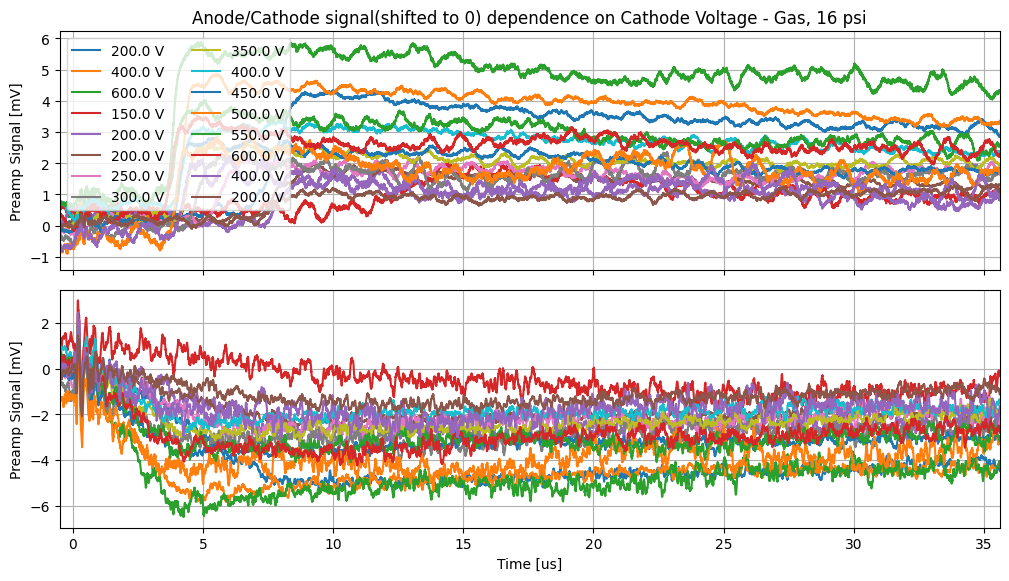

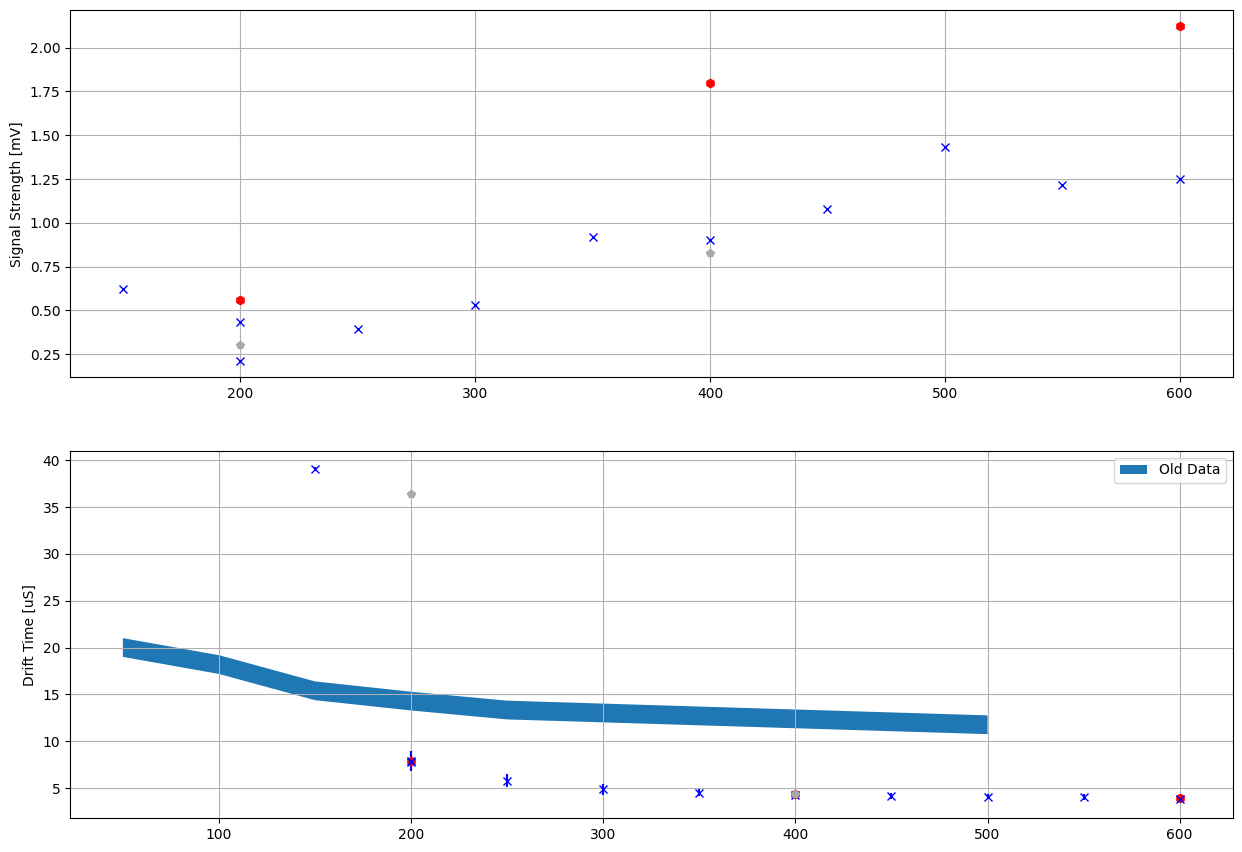

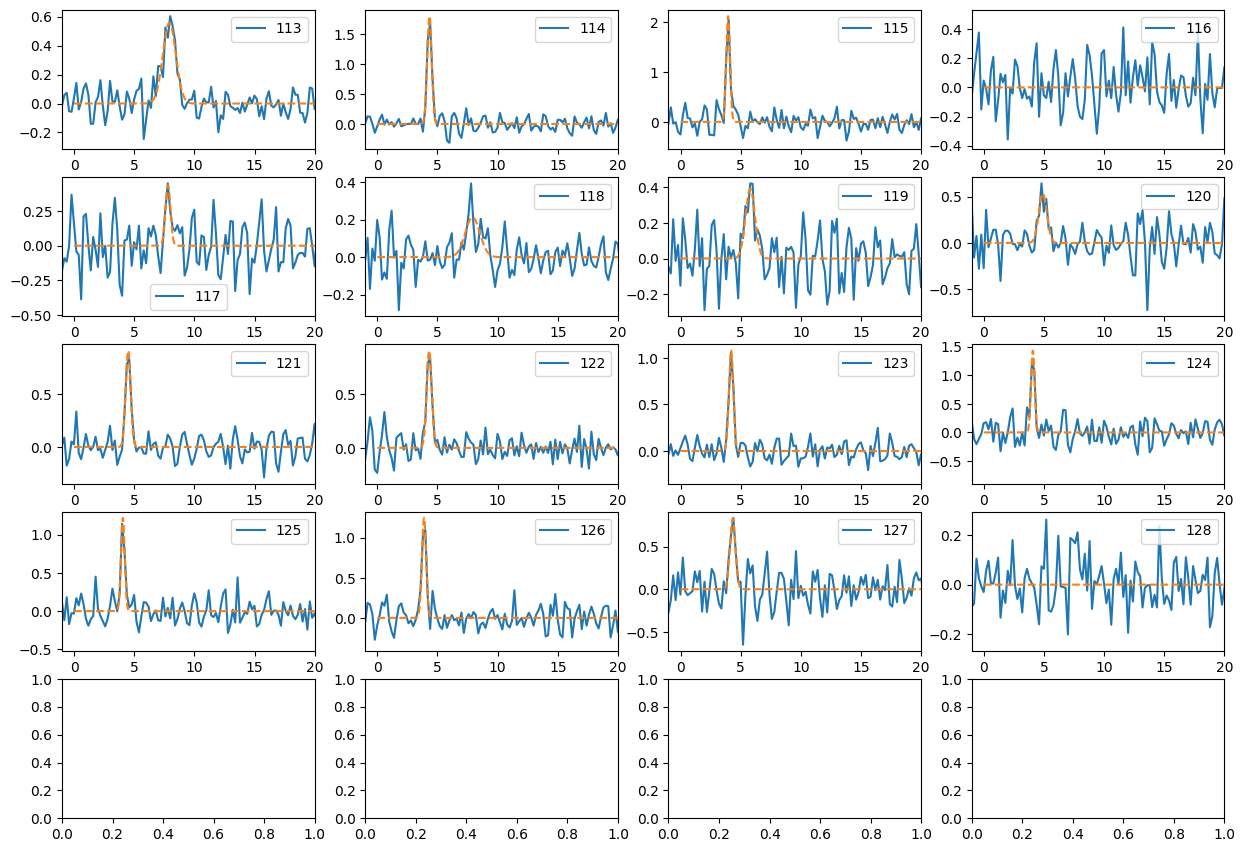

In [228]:
Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

Runlist_q = Runlist.query("RN in [113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128]") #113,114,115,116,

#35,36,37,,100,102,103
Runlist_q
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::].iloc()):
    #print(entry["RN"])
    WF=GetWaveform(entry)

    #print(WF)
    
    Run={}
    Run["info"]=entry
    Run["waveform"]=WF
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))
    norm_amp_anode=np.average(WF[0:1:1]["Average Anode"])
    plots[0].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit) )

    
    norm_amp_cathode=np.average(WF[0:1:1]["Average Cathode"])
    plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Gas, 16 psi"%(Label))
plots[0].legend(ncol=2)

plots[1].set_xlim(-0.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()


fig,ax= plt.subplots(2, 1, figsize=(15,10.5))

fig2,bx= plt.subplots(5,4, figsize=(15,10.5))

#print(bx)
colors=["r","blue","darkgrey"]
marker=["h","x","p"]

sec=0
y1=np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])-1
y2=np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])+1

j=-1
k=-1
ax[1].fill_between(x=[100/2,200/2,300/2,400/2,500/2,1000/2],y1=y1, y2=y2, label="Old Data")
for i,run in enumerate(Runs):
    if run["info"]["RN"] in [116,127]:
        sec+=1

    if i%4==0:
        j=j+1
    if i%4==0:
        k=0    
    print(j,k)   
    ydata=run["waveform"]["Average Anode"][::50].diff()[1:-3]
    xdata=run["waveform"]["Time"][::50][1:-3]
    #print(len(ydata),len(xdata))
    bx[j][k].errorbar(x=xdata, y=ydata,label=run["info"]["RN"])
    bx[j][k].legend()

    limits=([-1,-1,-5],[max(ydata)*1.1,20,5])
    p0s=[max(ydata)*0.8,np.array(xdata)[np.where(ydata==max(ydata))][0], 1]

    print(p0s)
    print(limits)
    fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)

    for step_fix in [100,150,200]:
        
        if fit_par[0] <=0:
            print("Bad fit")
            ydata=run["waveform"]["Average Anode"][::step_fix].diff()[1:]
            xdata=run["waveform"]["Time"][::step_fix][1:]
            fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
        else:
            break

    run["Drifttime"]=fit_par[1]
    run["Drifttime_stdev"]=abs(fit_par[2])
    run["Waveform_amp"] = fit_par[0]
    run["Amp_error"] = fit_par[0]*(0.01)

    #signal
    xfit=np.arange(0,25,0.01)
   

    yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
    bx[j][k].errorbar(x=xfit, y=yfit,fmt="--")
    bx[j][k].set_xlim(-1,20)
    k=k+1

    
    print(fit_par)


    print(run["info"]["RN"],run["info"]["Cathode Voltage"])
    #print(fit_par,fit_cov)

    ax[1].errorbar(x=run["info"]["Cathode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*5, fmt =marker[sec], c=colors[sec])
    ax[0].errorbar(x=run["info"]["Cathode Voltage"],y=run["Waveform_amp"],fmt =marker[sec],c=colors[sec] )
   
#ax[0].text(200,12, "poop")
#ax[0].legend(ncol=4)
ax[0].grid()
#ax[0].set_xlim(0,25)


print(ax[1].get_legend_handles_labels())

ax[1].legend()
ax[1].grid()
ax[1].set_ylabel("Drift Time [uS]")

#ax[2].grid()
ax[0].set_ylabel("Signal Strength [mV]")
#plt.xlim(5,15)


129 600.0
[0.8520960000000003, 3.99199994, 1]
([-1, -1, -5], [1.1716320000000005, 20, 5])
[1.199481   3.92985098 0.05846059] 2.8647309804997287
[1.199481   3.92985098 0.05846059]
130 600.0
[0.7462320000000006, 3.79199995, 1]
([-1, -1, -5], [1.0260690000000008, 20, 5])
[1.05073584 3.89211209 0.05823708] 2.959322091526116
[1.05073584 3.89211209 0.05823708]
131 600.0
[0.534208000000001, 3.79199995, 1]
([-1, -1, -5], [0.7345360000000014, 20, 5])
[0.79355987 3.89920045 0.05461522] 3.231440449960574
[0.79355987 3.89920045 0.05461522]
132 600.0
[0.35919999999999846, 3.99199991, 1]
([-1, -1, -5], [0.4938999999999979, 20, 5])
[0.48514122 3.93067587 0.05946021] 3.481675867999626
[0.48514122 3.93067587 0.05946021]
133 600.0
[0.3659840000000003, 3.99199994, 1]
([-1, -1, -5], [0.5032280000000005, 20, 5])
[0.49842247 3.93135162 0.06122397] 3.473871619694864
[0.49842247 3.93135162 0.06122397]
([<matplotlib.collections.PolyCollection object at 0x000001F7AF4EF8D0>], ['Old Data'])


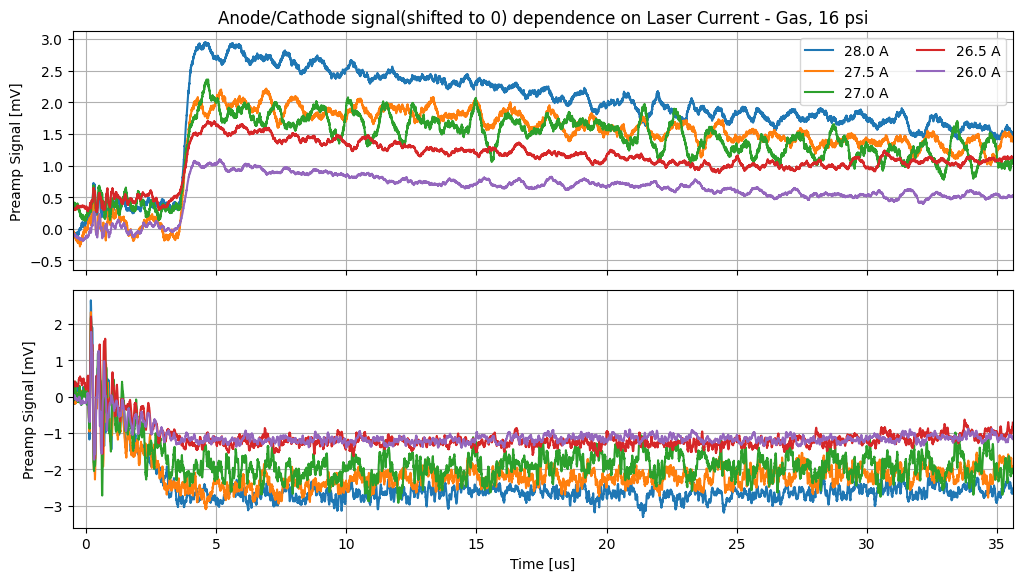

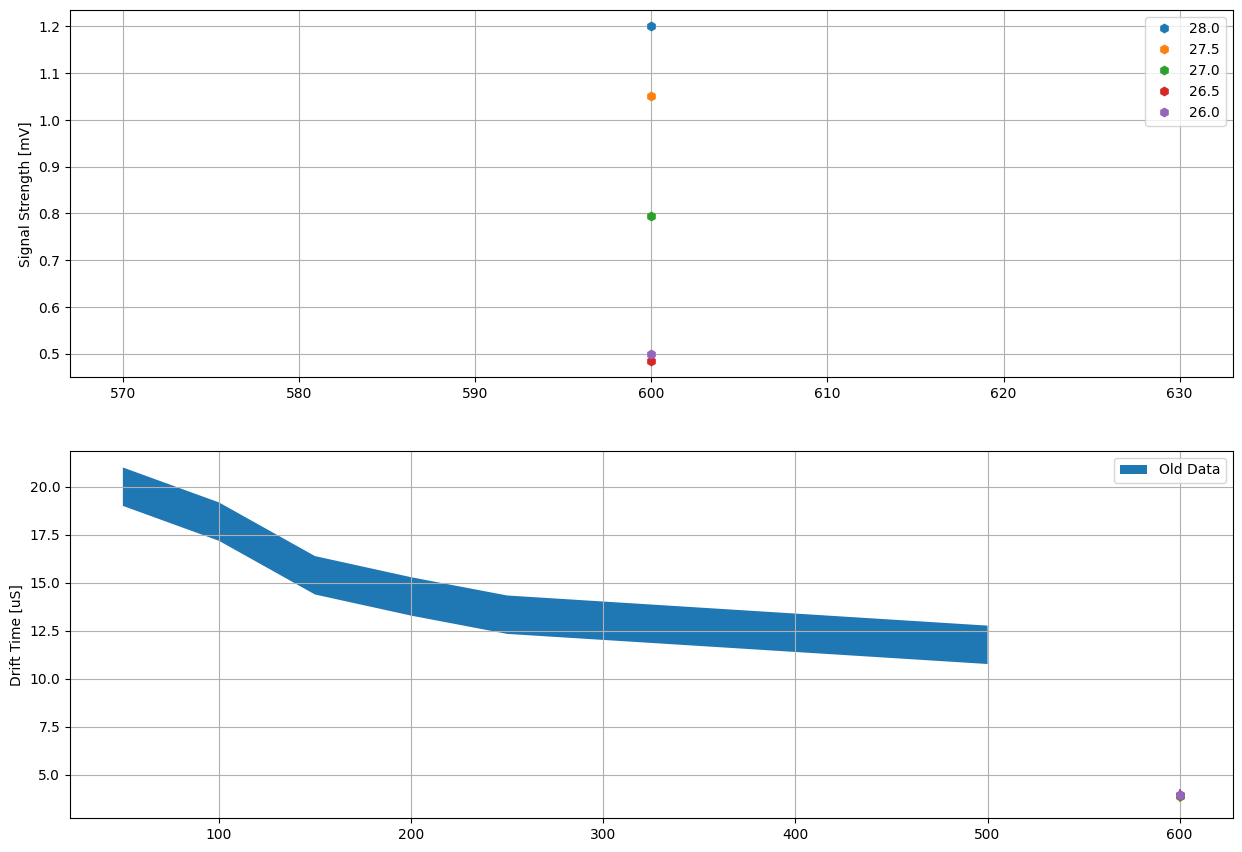

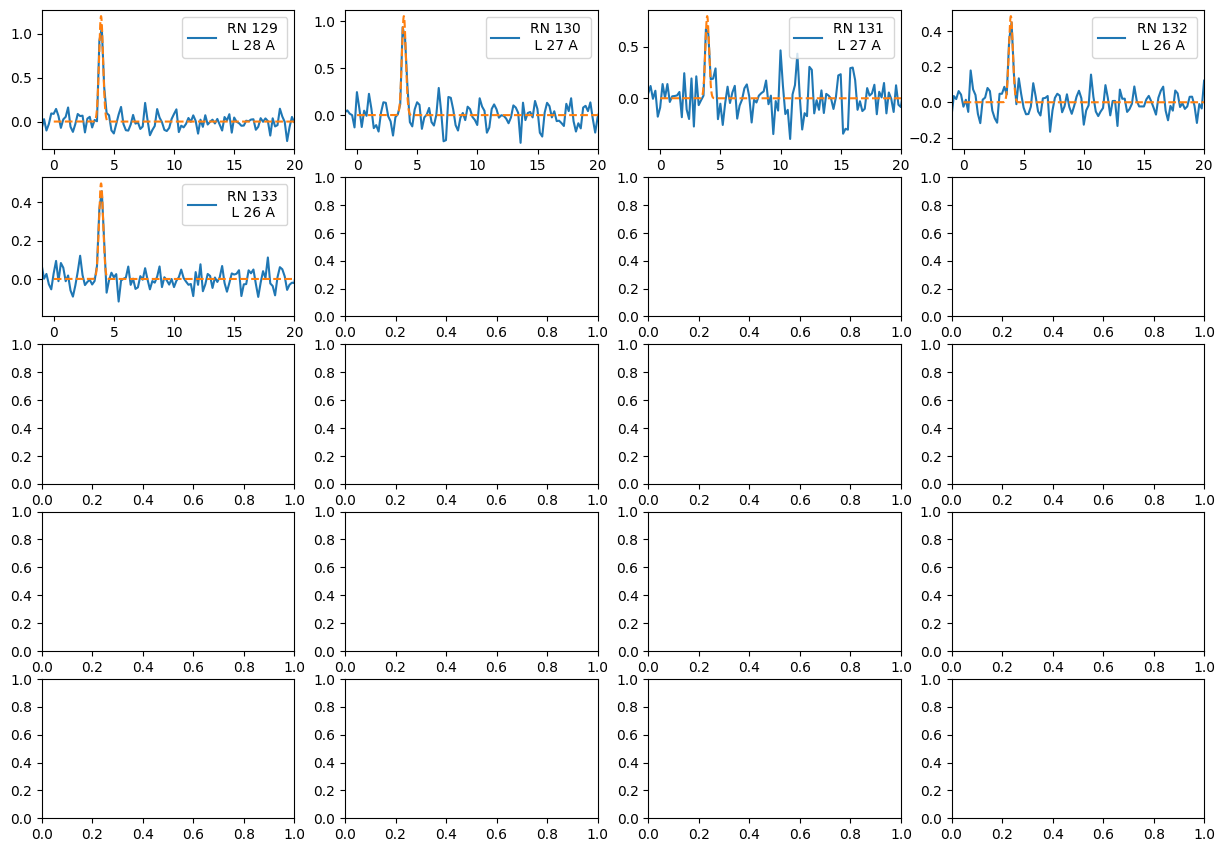

In [261]:
Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

Runlist_q = Runlist.query("RN in [129,130,131,132,133,]") #113,114,115,116,

#35,36,37,,100,102,103
Runlist_q
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Laser Current"
unit ="A"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::].iloc()):
    #print(entry["RN"])
    WF=GetWaveform(entry)

    #print(WF)
    
    Run={}
    Run["info"]=entry
    Run["waveform"]=WF
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))
    norm_amp_anode=np.average(WF[0:1:1]["Average Anode"])
    plots[0].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit) )

    
    norm_amp_cathode=np.average(WF[0:1:1]["Average Cathode"])
    plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Gas, 16 psi"%(Label))
plots[0].legend(ncol=2)

plots[1].set_xlim(-0.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()


fig,ax= plt.subplots(2, 1, figsize=(15,10.5))

fig2,bx= plt.subplots(5,4, figsize=(15,10.5))

#print(bx)
colors=["r","blue","darkgrey"]
marker=["h","x","p"]

sec=0
y1=np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])-1
y2=np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])+1

j=-1
k=-1
ax[1].fill_between(x=[100/2,200/2,300/2,400/2,500/2,1000/2],y1=y1, y2=y2, label="Old Data")
for i,run in enumerate(Runs):
    if run["info"]["RN"] in [116,127]:
        sec+=1

    if i%4==0:
        j=j+1
    if i%4==0:
        k=0    
    #print(j,k)   
    print(run["info"]["RN"],run["info"]["Cathode Voltage"])
    ydata=run["waveform"]["Average Anode"][::50].diff()[1:]
    xdata=run["waveform"]["Time"][::50][1:]
    #print(len(ydata),len(xdata))
   
    limits=([-1,-1,-5],[max(ydata)*1.1,20,5])
    p0s=[max(ydata)*0.8,np.array(xdata)[np.where(ydata==max(ydata))][0], 1]

    print(p0s)
    print(limits)
    fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
    print(fit_par, fit_par[1] -max(ydata))
    for step_fix in [100,150,200]:
        
        if fit_par[0] <=0:
            print("Bad fit")
            ydata=run["waveform"]["Average Anode"][::step_fix].diff()[1:]
            xdata=run["waveform"]["Time"][::step_fix][1:]
            fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
        else:
            break

    bx[j][k].errorbar(x=xdata, y=ydata,label="RN %d \n L %d A"%(run["info"]["RN"], run["info"]["Laser Current"]) )
    bx[j][k].legend()

    run["Drifttime"]=fit_par[1]
    run["Drifttime_stdev"]=abs(fit_par[2])
    run["Waveform_amp"] = fit_par[0]
    run["Amp_error"] = fit_par[0]*(0.01)

    #signal
    xfit=np.arange(0,25,0.01)



   

    yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
    bx[j][k].errorbar(x=xfit, y=yfit,fmt="--")
    bx[j][k].set_xlim(-1,20)
    k=k+1

    
    print(fit_par)

    ax[1].errorbar(x=run["info"]["Cathode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*5, fmt =marker[sec])
    ax[0].errorbar(x=run["info"]["Cathode Voltage"],y=run["Waveform_amp"],fmt =marker[sec],label=run["info"]["Laser Current"]) 
   
#ax[0].text(200,12, "poop")
#ax[0].legend(ncol=4)
ax[0].grid()
#ax[0].set_xlim(0,25)


print(ax[1].get_legend_handles_labels())

ax[1].legend()
ax[1].grid()
ax[1].set_ylabel("Drift Time [uS]")

#ax[2].grid()
ax[0].set_ylabel("Signal Strength [mV]")
ax[0].legend()
#plt.xlim(5,15)


133
134
135
136
137
138
139
140
141
142
143
144
145
146
133 600.0
[0.3659840000000003, 3.99199994, 1]
([-1, -1, -5], [0.5032280000000005, 20, 5])
[0.49842247 3.93135162 0.06122397] 3.473871619694864
[0.49842247 3.93135162 0.06122397]


134 600.0
[0.5533120000000054, 3.99199994, 1]
([-1, -1, -5], [0.7608040000000075, 20, 5])
[0.71877237 3.94816429 0.05520772] 3.2565242902626252
[0.71877237 3.94816429 0.05520772]


135 600.0
[0.536008000000001, 3.99199994, 1]
([-1, -1, -5], [0.7370110000000015, 20, 5])
[0.7249517  3.9312567  0.05196373] 3.261246700969362
[0.7249517  3.9312567  0.05196373]


136 600.0
[0.5016559999999999, 3.99199994, 1]
([-1, -1, -5], [0.6897769999999999, 20, 5])
[0.61746742 3.89062166 0.07095347] 3.263551659938038
[0.61746742 3.89062166 0.07095347]


137 600.0
[0.694744, 3.99199994, 1]
([-1, -1, -5], [0.9552730000000001, 20, 5])
[0.9484587  3.93375949 0.05814641] 3.0653294938151157
[0.9484587  3.93375949 0.05814641]


138 600.0
[0.6208880000000022, 3.99399994, 1]
([-1, -

(0.0, 650.0)

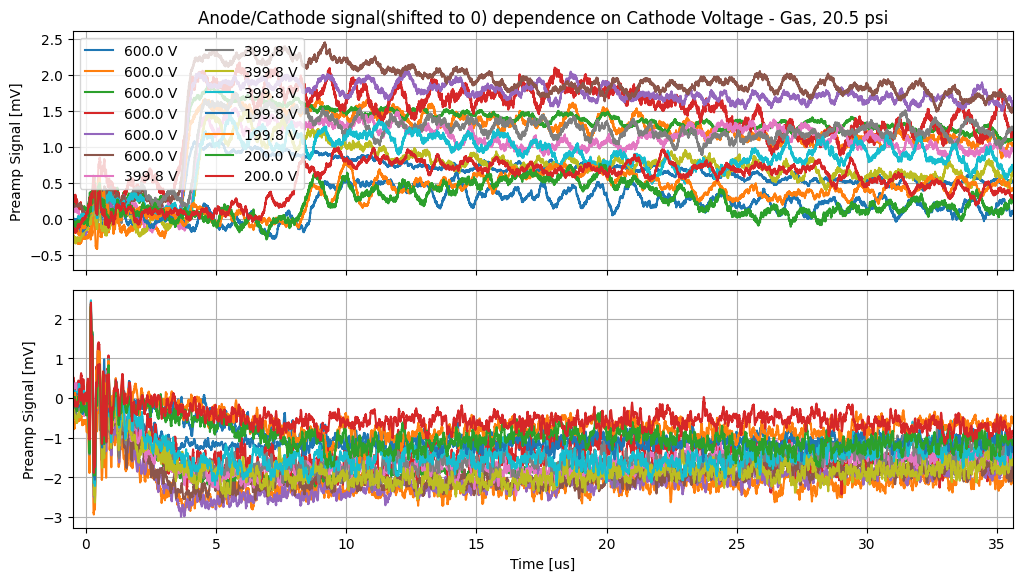

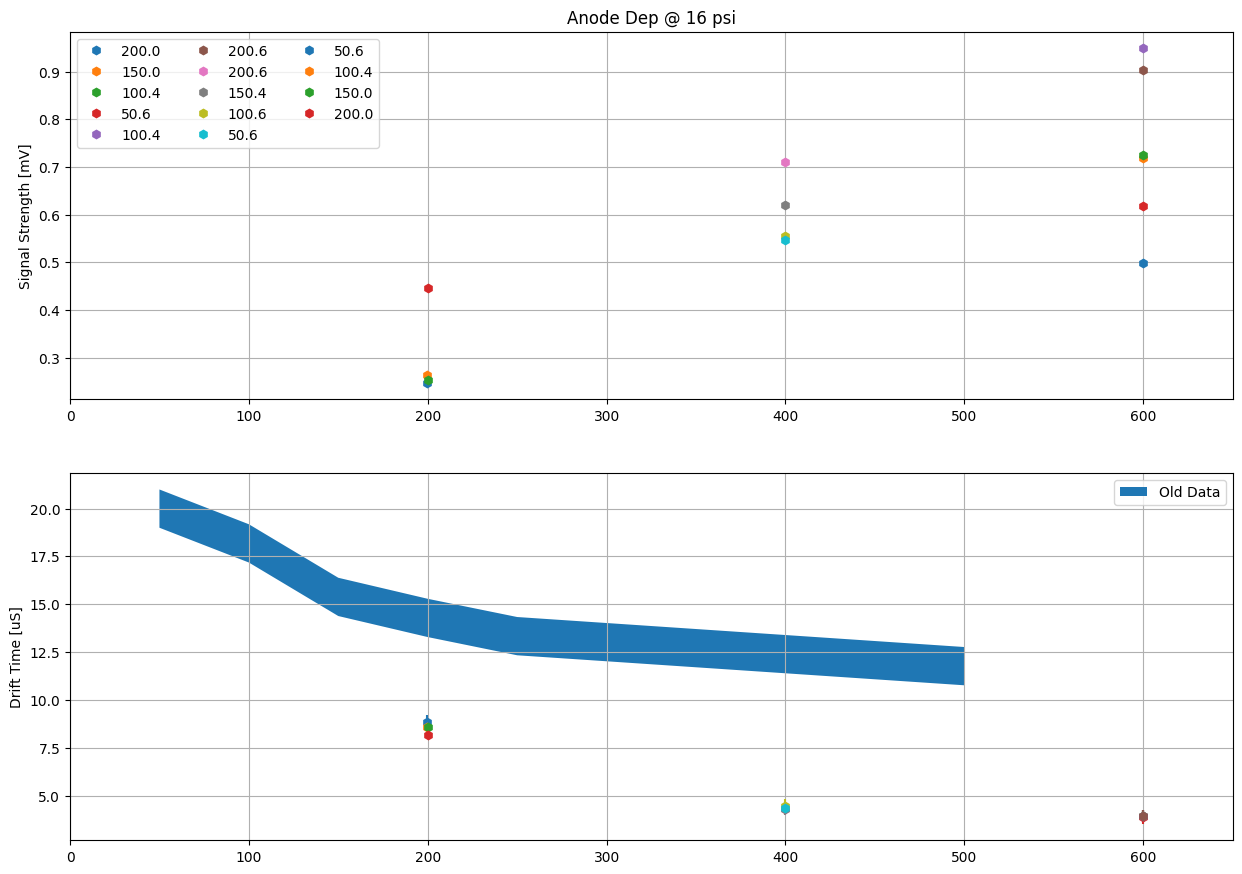

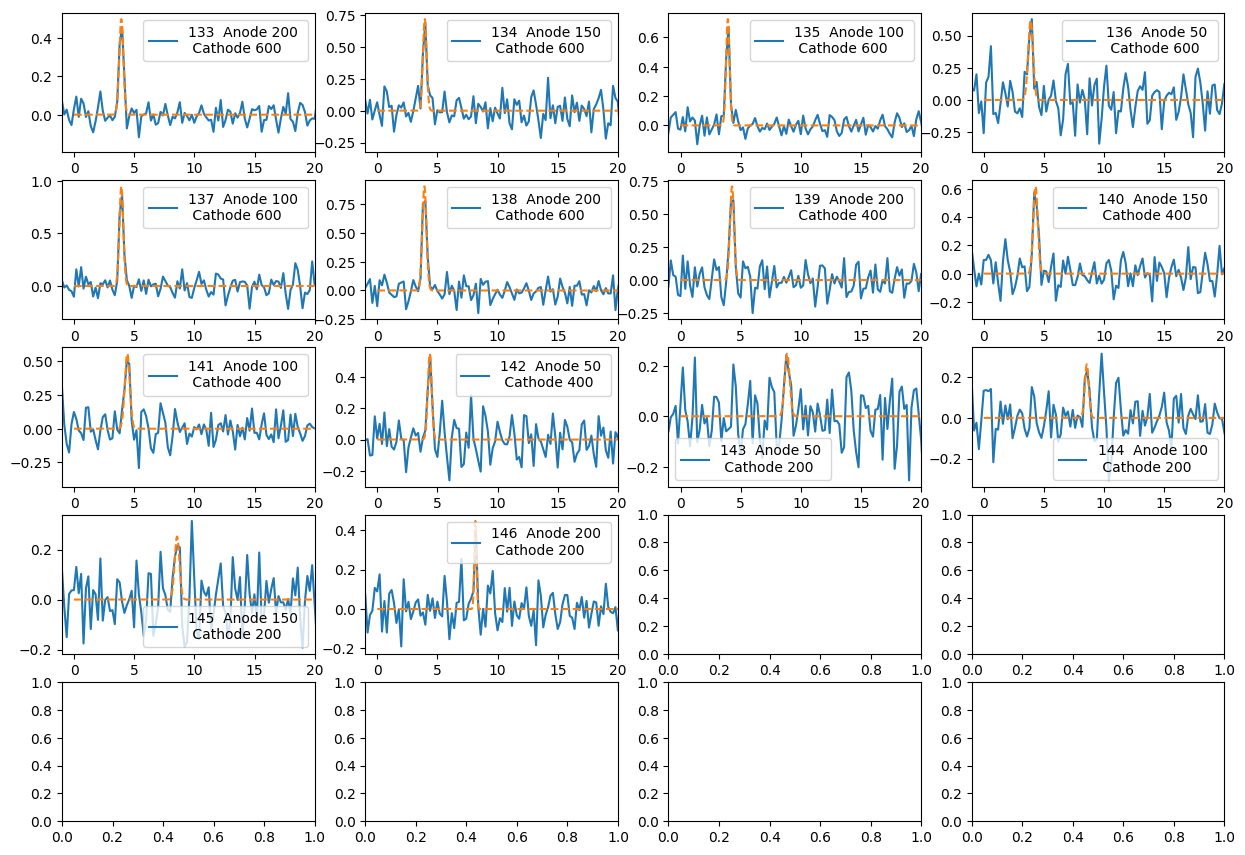

In [224]:
Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

Runlist_q = Runlist.query("RN in [133,134,135,136,137,138,139,140,141,142,143,144,145,146]") #113,114,115,116,

#35,36,37,,100,102,103
Runlist_q
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::].iloc()):
    #print(entry["RN"])
    try:
        WF=GetWaveform(entry)
    except:
        print("Bad wavefrom")

    #print(WF)
    
    Run={}
    Run["info"]=entry
    Run["waveform"]=WF

    try:
        norm_amp_anode=np.average(WF[0:1:1]["Average Anode"])
    except:
        print(entry["RN"]," Bad waveform")
        continue

    print(Run["info"]["RN"])
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))

    plots[0].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit) )

    
    norm_amp_cathode=np.average(WF[0:1:1]["Average Cathode"])
    plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Gas, 20.5 psi"%(Label))
plots[0].legend(ncol=2)

plots[1].set_xlim(-0.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()

#print(Runs," Next step")
fig,ax= plt.subplots(2, 1, figsize=(15,10.5))

fig2,bx= plt.subplots(5,4, figsize=(15,10.5))

#print(bx)
colors=["r","blue","darkgrey"]
marker=["h","x","p"]

sec=0
y1=np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])-1
y2=np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])+1

j=-1
k=-1
ax[1].fill_between(x=[100/2,200/2,300/2,400/2,500/2,1000/2],y1=y1, y2=y2, label="Old Data")
for i,run in enumerate(Runs):
    if run["info"]["RN"] in [116,127]:
        sec+=1

    if i%4==0:
        j=j+1
    if i%4==0:
        k=0    
    #print(j,k)   
    print(run["info"]["RN"],run["info"]["Cathode Voltage"])
    ydata=run["waveform"]["Average Anode"][::50].diff()[1:]
    xdata=run["waveform"]["Time"][::50][1:]
    #print(len(ydata),len(xdata))
   
    limits=([-1,-1,-5],[max(ydata)*1.1,20,5])
    p0s=[max(ydata)*0.8,np.array(xdata)[np.where(ydata==max(ydata))][0], 1]

    print(p0s)
    print(limits)
    fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
    print(fit_par, fit_par[1] -max(ydata))
    for step_fix in [100,150,200]:
        
        if fit_par[0] <=0:
            print("Bad fit")
            ydata=run["waveform"]["Average Anode"][::step_fix].diff()[1:]
            xdata=run["waveform"]["Time"][::step_fix][1:]
            fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
        else:
            break

    bx[j][k].errorbar(x=xdata, y=ydata,label="%i  Anode %d \n Cathode %d"%(run["info"]["RN"], run["info"]["Anode Voltage"],np.ceil(run["info"]["Cathode Voltage"])))
    bx[j][k].legend()

    run["Drifttime"]=fit_par[1]
    run["Drifttime_stdev"]=abs(fit_par[2])
    run["Waveform_amp"] = fit_par[0]
    run["Amp_error"] = fit_par[0]*(0.01)

    #signal
    xfit=np.arange(0,25,0.01)



   

    yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
    bx[j][k].errorbar(x=xfit, y=yfit,fmt="--")
    bx[j][k].set_xlim(-1,20)
    k=k+1

    
    print(fit_par)

    ax[1].errorbar(x=run["info"]["Cathode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*5, fmt =marker[sec])
    ax[0].errorbar(x=run["info"]["Cathode Voltage"],y=run["Waveform_amp"],fmt =marker[sec],label=run["info"]["Anode Voltage"])
    print("\n")
#ax[0].text(200,12, "poop")
#ax[0].legend(ncol=4)
ax[0].grid()
#ax[0].set_xlim(0,25)


print(ax[1].get_legend_handles_labels())

ax[1].legend()
ax[1].grid()
ax[1].set_ylabel("Drift Time [uS]")

#ax[2].grid()
ax[0].set_ylabel("Signal Strength [mV]")
ax[0].legend(ncol=3)
ax[0].set_xlim(0,650)
ax[0].set_title("Anode Dep @ 16 psi")
ax[1].set_xlim(0,650)
#plt.xlim(5,15)


run num   113
113
run num   120
120
run num   122
122
run num   124
124
run num   138
138
run num   147
147
run num   148
148
run num   149
149
run num   150
150
run num   151
151
 step
113 200.0
[0.4836559999999992, 7.99499983, 1]
([-1, -1, -5], [0.6650269999999989, 20, 5])
[0.55876636 7.92533086 0.19113206] 7.320760858414457
[0.55876636 7.92533086 0.19113206]


120 300.0
[0.5131759999999986, 4.79199992, 1]
([-1, -1, -5], [0.705616999999998, 20, 5])
[0.53156597 4.90757374 0.11881384] 4.266103737341527
[0.53156597 4.90757374 0.11881384]


122 400.0
[0.6620720000000007, 4.39199993, 1]
([-1, -1, -5], [0.9103490000000009, 20, 5])
[0.90100827 4.31343563 0.07489569] 3.4858456286208943
[0.90100827 4.31343563 0.07489569]


124 500.0
[0.9651759999999996, 3.99199994, 1]
([-1, -1, -5], [1.3271169999999994, 20, 5])
[1.43201365 4.07546046 0.05382646] 2.868990456936495
[1.43201365 4.07546046 0.05382646]


138 600.0
[0.6208880000000022, 3.99399994, 1]
([-1, -1, -5], [0.8537210000000031, 20, 5])
[0.9

(0.0, 650.0)

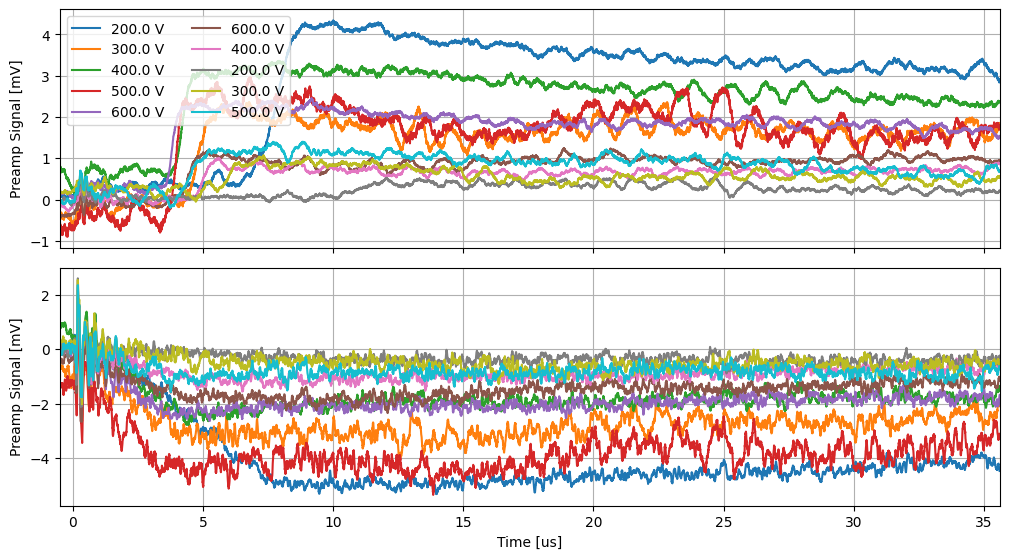

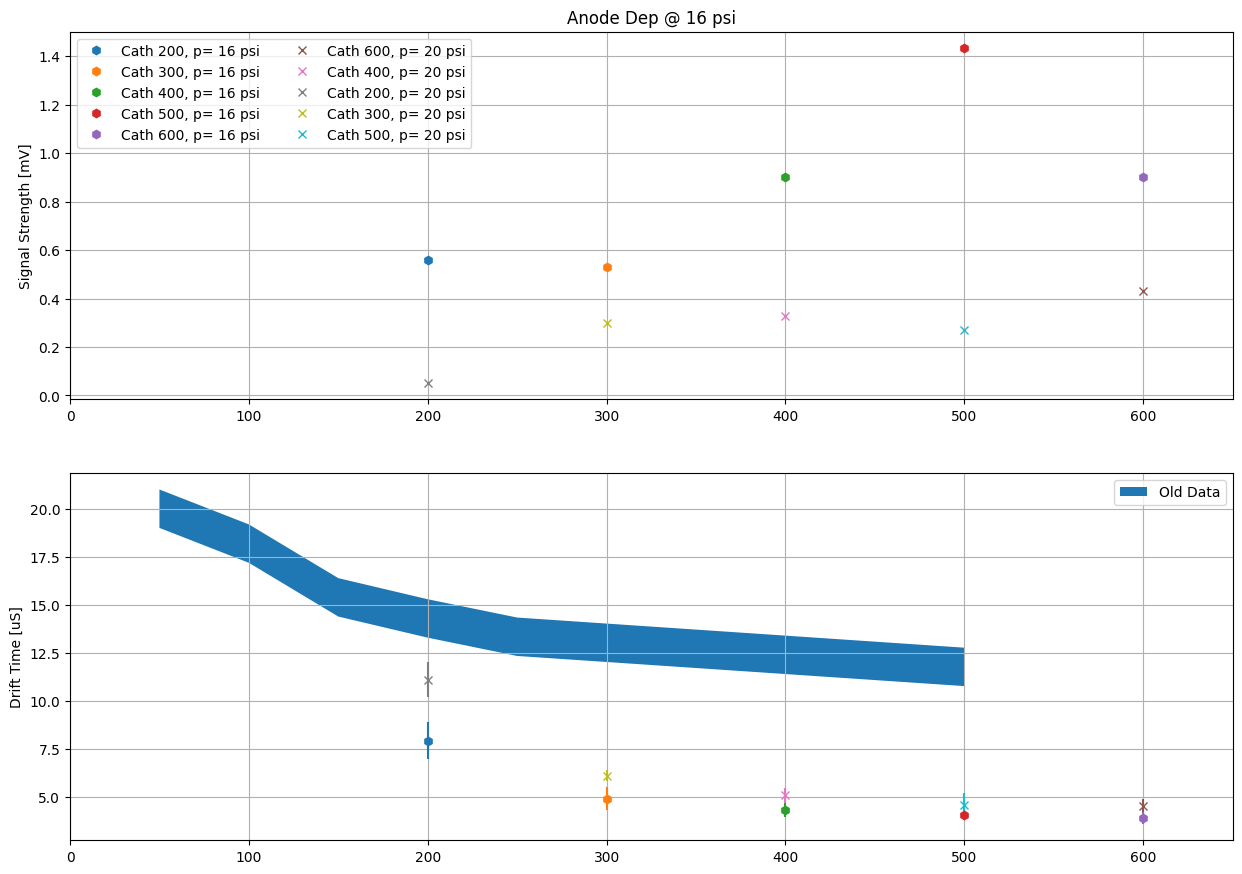

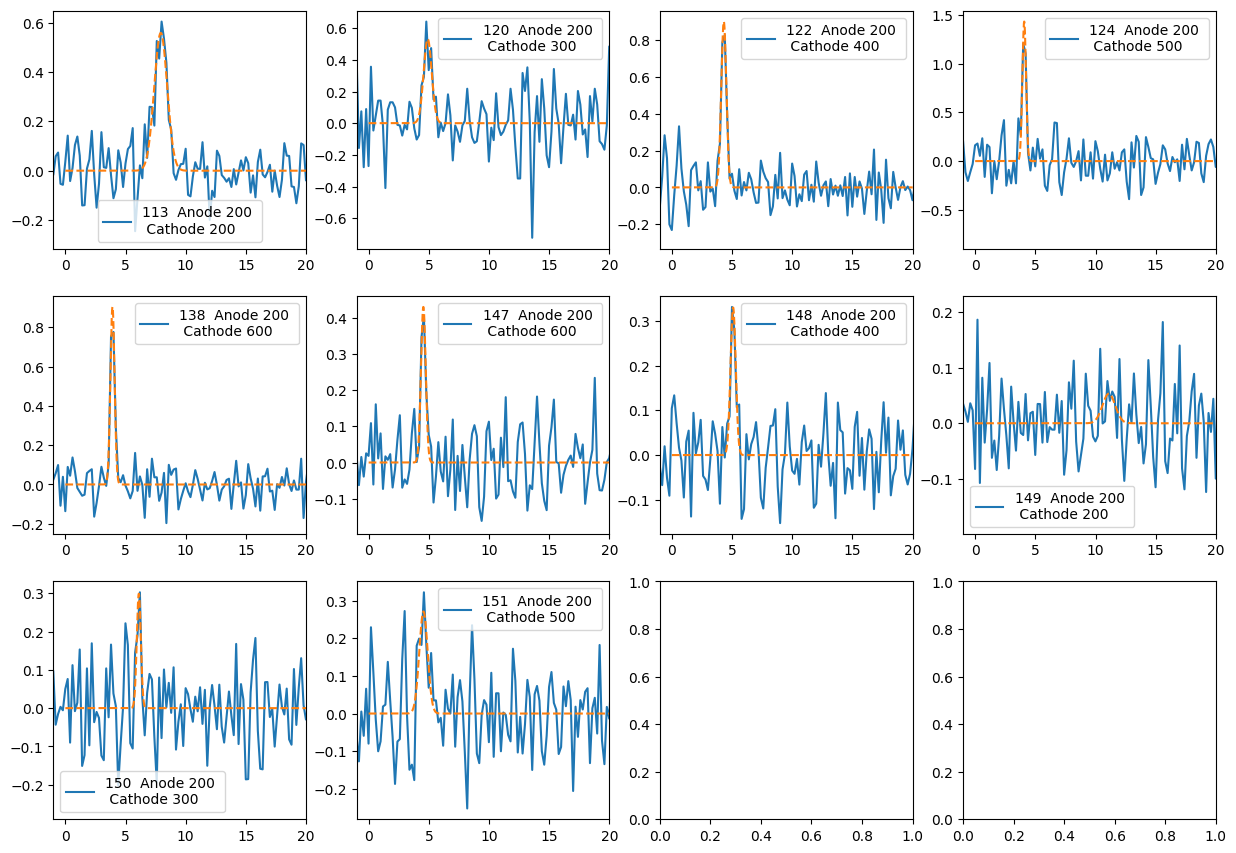

In [257]:
Runlist= pd.read_table("Runlist.tsv")
Runlist["RN"]=pd.to_numeric(Runlist["RN"])

Runlist_q = Runlist.query("RN in [147,148,149,150,151,138,122,113,120,124]") #113,114,115,116,

#35,36,37,,100,102,103
Runlist_q
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::].iloc()):
    print("run num  ",entry["RN"])
    try:
        WF=GetWaveform(entry)
    except:
        print("Bad wavefrom")

    #print(WF)
    
    Run={}
    Run["info"]=entry
    Run["waveform"]=WF

    try:
        norm_amp_anode=np.average(WF[0:1:1]["Average Anode"])
    except:
        print(entry["RN"]," Bad waveform")
        continue

    print(Run["info"]["RN"])
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))

    plots[0].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit) )

    
    norm_amp_cathode=np.average(WF[0:1:1]["Average Cathode"])
    plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)

print(" step")
#plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Gas, 20.5 psi"%(Label))
plots[0].legend(ncol=2)

plots[1].set_xlim(-0.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()

#print(Runs," Next step")
fig,ax= plt.subplots(2, 1, figsize=(15,10.5))

fig2,bx= plt.subplots(3,4, figsize=(15,10.5))

#print(bx)
colors=["r","blue","darkgrey"]
marker=["h","x","p"]

sec=0
y1=np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])-1
y2=np.array([20,20/1.1,20/1.3,20/1.4,20/1.5,20/1.7])+1

j=-1
k=-1
ax[1].fill_between(x=[100/2,200/2,300/2,400/2,500/2,1000/2],y1=y1, y2=y2, label="Old Data")
for i,run in enumerate(Runs):
    if run["info"]["RN"] in [147]:
        sec+=1

    if i%4==0:
        j=j+1
    if i%4==0:
        k=0    
    #print(j,k)   
    print(run["info"]["RN"],run["info"]["Cathode Voltage"])
    ydata=run["waveform"]["Average Anode"][::50].diff()[5:]
    xdata=run["waveform"]["Time"][::50][5:]
    #print(len(ydata),len(xdata))
   
    limits=([-1,-1,-5],[max(ydata)*1.1,20,5])
    p0s=[max(ydata)*0.8,np.array(xdata)[np.where(ydata==max(ydata))][0], 1]

    print(p0s)
    print(limits)
    fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
    print(fit_par, fit_par[1] -max(ydata))
    for step_fix in [100,150,200]:
        
        if fit_par[0] <=0:
            print("Bad fit")
            ydata=run["waveform"]["Average Anode"][::step_fix].diff()[1:]
            xdata=run["waveform"]["Time"][::step_fix][1:]
            fit_par, fit_cov = curve_fit(gaussian,xdata,ydata, p0=p0s)
            
            xfit=np.arange(0,25,0.01)
            yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
            bx[j][k].errorbar(x=xfit, y=yfit,fmt="..",c="grey")


        else:
            break

    bx[j][k].errorbar(x=xdata, y=ydata,label="%i  Anode %d \n Cathode %d"%(run["info"]["RN"], run["info"]["Anode Voltage"],np.ceil(run["info"]["Cathode Voltage"])))
    bx[j][k].legend()

    run["Drifttime"]=fit_par[1]
    run["Drifttime_stdev"]=abs(fit_par[2])
    run["Waveform_amp"] = fit_par[0]
    run["Amp_error"] = fit_par[0]*(0.01)

    #signal
    xfit=np.arange(0,25,0.01)
 
    yfit=gaussian(xfit, fit_par[0],fit_par[1],fit_par[2])
    bx[j][k].errorbar(x=xfit, y=yfit,fmt="--")
    bx[j][k].set_xlim(-1,20)
    k=k+1

    
    print(fit_par)

    ax[1].errorbar(x=run["info"]["Cathode Voltage"], y=run["Drifttime"], yerr=run["Drifttime_stdev"]*5, fmt =marker[sec])
    ax[0].errorbar(x=run["info"]["Cathode Voltage"],y=run["Waveform_amp"],fmt =marker[sec],label="Cath %d, p= %d psi"%(run["info"]["Cathode Voltage"],run["info"]["Target Pressure"] ))
    print("\n")
#ax[0].text(200,12, "poop")
#ax[0].legend(ncol=4)
ax[0].grid()
#ax[0].set_xlim(0,25)


print(ax[1].get_legend_handles_labels())

ax[1].legend()
ax[1].grid()
ax[1].set_ylabel("Drift Time [uS]")

#ax[2].grid()
ax[0].set_ylabel("Signal Strength [mV]")
ax[0].legend(ncol=2)
ax[0].set_xlim(0,650)
ax[0].set_title("Anode Dep @ 16 psi")
ax[1].set_xlim(0,650)
#plt.xlim(5,15)


In [151]:
#xdata[np.where(ydata==max(ydata))]
np.array(xdata)[np.where(ydata==max(ydata))][0]

4.39199993

      RN  Cathode Voltage  Anode Voltage  Laser Current  Target Pressure
99   100            600.0          200.0           28.0             20.5
101  102           1000.0          200.0           28.0             20.5
102  103           1400.0          200.0           28.0             20.5
103
102
100


Text(80.47222222222221, 0.5, 'Preamp Signal [mV]')

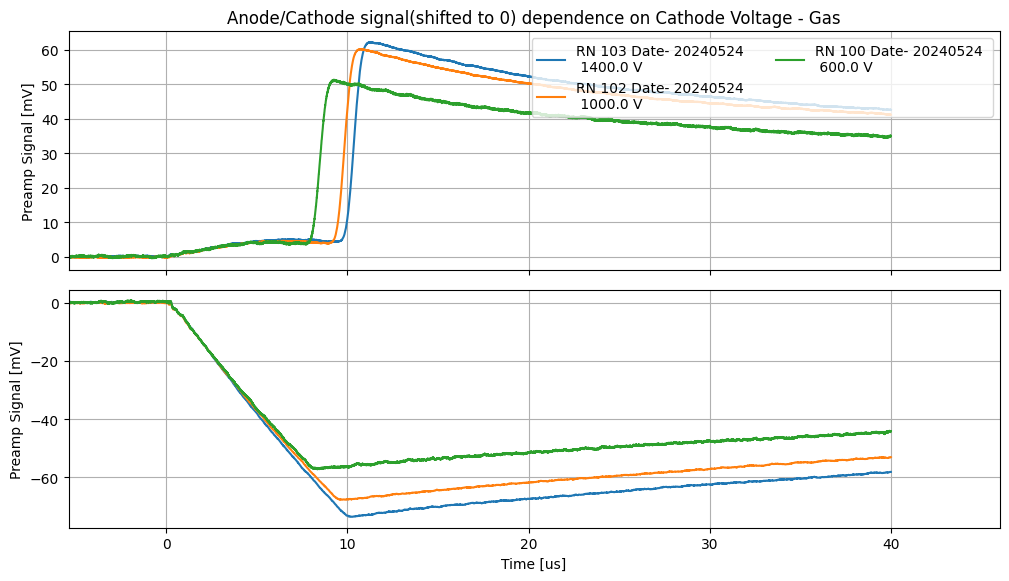

In [182]:
Runlist_q = Runlist.query("RN in [100,102,103]")
print(Runlist_q[["RN","Cathode Voltage","Anode Voltage","Laser Current","Target Pressure"]])
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]

Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::-1].iloc()):
    print(entry["RN"])
    WF=GetWaveform(entry)

   # print(WF.keys())
    
    Run={}
    Run["info"]=entry
    Run["wavefrom"]=WF
    Runs.append(Run)
    #print(WF[0:20:1]["Average Anode"])
    #print(np.average(WF[0:20:1]["Average Anode"]))
    norm_amp_anode=np.average(WF[0:20:1]["Average Anode"])
    plots[0].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Anode"]-norm_amp_anode, fmt ="", label="RN %d Date- %d \n %s %s"%(int(entry["RN"]),int(entry["Date"]),entry[Label], unit) )

    
    norm_amp_cathode=np.average(WF[0:20:1]["Average Cathode"])
    plots[1].errorbar(x=WF[::1]["Time"], y= WF[::1]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Gas"%(Label))
plots[0].legend(ncol=2,loc="upper right")

plots[1].set_xlim(-5.4,46)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()


In [81]:




WF = WF.replace([np.inf, -np.inf], np.nan)
if not pd.api.types.is_any_real_numeric_dtype(WF["Average Anode"]) :
    print("Not")

Not


        RN        Date  Config Number  Run Number    Configuration  \
99   100.0  20240524.0          131.0       100.0  SingleGrid_20mm   
100  101.0  20240524.0          131.0       101.0  SingleGrid_20mm   

           type  Anode Voltage  Cathode Voltage  Laser Current  \
99   Production          200.0            600.0           28.0   
100  Production          200.0            600.0           28.0   

     Laser Frequency  ... Target Pressure  TC1(K)  TC2(K)  TC3(K)  \
99             789.0  ...            20.5   294.0   294.0   294.0   
100            789.0  ...            20.5   294.0   294.0   294.0   

     Drift Length  Filepath (GDrive)  Filepath (ODrive)  Filepath (server)  \
99            NaN                NaN                NaN                NaN   
100           NaN                NaN                NaN                NaN   

     window(us)                     Notes  
99         50.0                       NaN  
100        50.0  High veritcal resolution  

[2 rows x 22 c

TypeError: unsupported operand type(s) for -: 'str' and 'int'

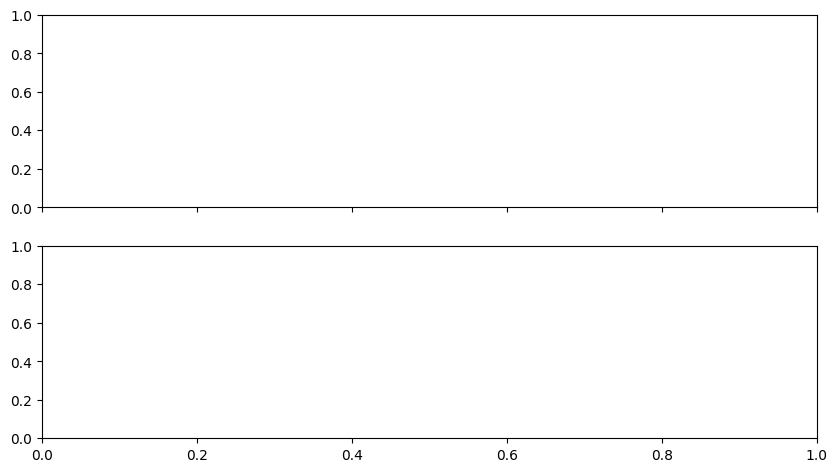

In [69]:
Runlist_q = Runlist.query("RN >= 100 & RN <= 101")
print(Runlist_q)
fig, plots = plt.subplots(2, 1, figsize=(10,5.5),sharex=True)

Runs=[]
steps=1
Label="Cathode Voltage"
unit ="V"

norm_amp_anode=0
norm_amp_cathode=0

for i, entry in enumerate(Runlist_q[::-1].iloc()):
    print(entry["RN"])
    WF=GetWaveform(entry)
    WF=WF.dropna()
    print(WF[1:2]["Time"])
     
    Run={}
    Run["info"]=entry
    Run["wavefrom"]=WF
    Runs.append(Run)

    norm_amp_anode=0#np.average(WF[0:20:1]["Average Anode"])
    plots[0].errorbar(x=WF[::steps]["Time"], y= WF[::steps]["Average Anode"]-norm_amp_anode, fmt ="", label="%s %s"%(entry[Label], unit ) )

    
    norm_amp_cathode=0#np.average(WF[0:20:1]["Average Cathode"])
    plots[1].errorbar(x=WF[::steps]["Time"], y= WF[::steps]["Average Cathode"]-norm_amp_cathode, fmt ="", label="%s %s"%(entry[Label], unit) )


    #plots.errorbar(x=WF["Time"], y=WF["Average Cathode"])
#plt.subplots_adjust(hspace=None)
plt.tight_layout()
plots[0].grid(True)
#plots[0].set_xlabel("Time [us]")
plots[0].set_ylabel("Preamp Signal [mV]")
#plots[0].set_ylim(0,52)


plots[0].set_title("Anode/Cathode signal(shifted to 0) dependence on %s - Room Temp Gas "%(Label))
plots[0].legend(ncol=4)

#plots[1].set_xlim(-5.5,35.6)
#plots[1].set_ylim(0,49)
plots[1].grid(True)
plots[1].set_xlabel("Time [us]")
plots[1].set_ylabel("Preamp Signal [mV]")

#plots[1].set_title("Cathode signal dependence on Laser Current")
#plots[1].legend()
